# Linear SVM modeling

##### Import libraries and data

In [125]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# import data
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

# get categorical columns
cat_cols = []
for col in train.columns:
    if (train[col].nunique() < 10) & (col != "target"):
        cat_cols.append(col)
        
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(train[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
train_dummies = train.copy()
train_dummies.drop(cat_cols, axis=1, inplace=True)
train_set = pd.concat([train_dummies, dummies], axis=1)

# remove unecessary features
train_set.drop(["fbs_1", "cp_3", "restecg_2", "ca_4"], axis=1, inplace=True)
 
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(val[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
val_dummies = val.copy()
val_dummies.drop(cat_cols, axis=1, inplace=True)
val_set = pd.concat([val_dummies, dummies], axis=1)


train_set.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,restecg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,68,120,211,115,1.5,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,60,140,185,155,3.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,51,110,175,123,0.6,1,1,0,1,1,0,0,1,0,0,0,0,1,0
3,57,124,261,141,0.3,0,1,1,0,1,0,0,1,0,0,0,0,0,1
4,56,120,236,178,0.8,1,1,1,0,1,0,0,1,0,0,0,0,1,0


# 1. Split X and y

In [126]:
X = train.drop("target", axis=1)
y = train.target

X_val = val.drop("target", axis=1)
y_val = val.target

# 2. Scaling

In [127]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_val = sc.transform(X_val)

cols = train.drop("target", axis=1).columns
X = pd.DataFrame(X, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)

# 3. Hyperparameter tuning

In [128]:
params = {
    "C":[0.1, 0.05, 1, 5, 10],
    "tol":[0.000001, 0.00001, 0.0001, 0.001],
    "max_iter":[1000, 2000, 5000]
}

gs = GridSearchCV(LinearSVC(), param_grid=params, cv=5)
gs.fit(X, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 1, 5, 10],
                         'max_iter': [1000, 2000, 5000],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [129]:
gs.best_params_

{'C': 5, 'max_iter': 2000, 'tol': 1e-06}

In [130]:
model1 = gs.best_estimator_

# Performance Metrics

In [137]:
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       114
           1       0.84      0.92      0.88       130

    accuracy                           0.86       244
   macro avg       0.87      0.86      0.86       244
weighted avg       0.86      0.86      0.86       244


 validation scores
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.86      0.90      0.88        20

    accuracy                           0.82        28
   macro avg       0.79      0.76      0.77        28
weighted avg       0.82      0.82      0.82        28



C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Feature importances

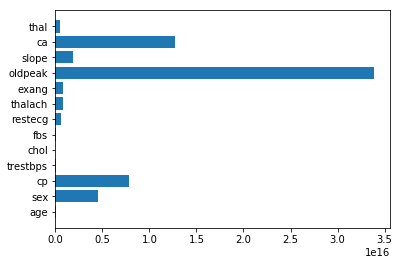

In [138]:
# find most important features
means = [X[col].mean() for col in X.columns]
coef = model1.coef_
importances = abs(coef/means)[0]

plt.barh(X.columns, importances)
plt.show()

## Remodel with only most important features

In [139]:
X_t = pd.concat([X.thalach, X.sex], axis=1)
X_val_t = pd.concat([X_val.thalach, X_val.sex], axis=1)

## Hyper parameter tuning

In [140]:
params = {
    "C":[0.1, 0.05, 1, 5, 10],
    "tol":[0.000001, 0.00001, 0.0001, 0.001],
    "max_iter":[500, 1000, 2000, 5000]
}

gs = GridSearchCV(LinearSVC(), param_grid=params, cv=5)
gs.fit(X_t, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 1, 5, 10],
                         'max_iter': [500, 1000, 2000, 5000],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [141]:
gs.best_params_

{'C': 5, 'max_iter': 1000, 'tol': 1e-06}

In [142]:
model2 = gs.best_estimator_

# Performance Metrics

In [143]:
model2.fit(X_t, y)
train_pred = model2.predict(X_t)
y_pred = model2.predict(X_val_t)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       114
           1       0.72      0.75      0.73       130

    accuracy                           0.71       244
   macro avg       0.71      0.71      0.71       244
weighted avg       0.71      0.71      0.71       244


 validation scores
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.73      0.80      0.76        20

    accuracy                           0.64        28
   macro avg       0.53      0.53      0.52        28
weighted avg       0.61      0.64      0.63        28



C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Add more features

In [144]:
X_t = pd.concat([X.thalach, X.sex, X.ca, X.trestbps], axis=1)
X_val_t = pd.concat([X_val.thalach, X_val.sex, X_val.ca, X_val.trestbps], axis=1)

## Hyper parameter tuning

In [145]:
params = {
    "C":[0.1, 0.05, 1, 5, 10],
    "tol":[0.000001, 0.00001, 0.0001, 0.001],
    "max_iter":[100, 500, 1000, 2000, 5000]
}

gs = GridSearchCV(LinearSVC(), param_grid=params, cv=5)
gs.fit(X_t, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 1, 5, 10],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
gs.best_params_

{'C': 5, 'max_iter': 100, 'tol': 1e-06}

In [148]:
model3 = gs.best_estimator_

# Performance Metrics

In [149]:
model3.fit(X_t, y)
train_pred = model3.predict(X_t)
y_pred = model3.predict(X_val_t)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       114
           1       0.80      0.85      0.82       130

    accuracy                           0.81       244
   macro avg       0.81      0.80      0.81       244
weighted avg       0.81      0.81      0.81       244


 validation scores
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.83      0.75      0.79        20

    accuracy                           0.71        28
   macro avg       0.67      0.69      0.67        28
weighted avg       0.74      0.71      0.72        28



C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
